In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('META.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-29,257.809998,263.329987,256.899994,261.790009,261.790009,20200200
1,2020-09-30,261.980011,266.079987,260.100006,261.899994,261.899994,20142500
2,2020-10-01,265.350006,268.329987,264.799988,266.630005,266.630005,20009800
3,2020-10-02,261.209991,265.149994,259.179993,259.940002,259.940002,16367600
4,2020-10-05,262.200012,264.869995,260.839996,264.649994,264.649994,12822300


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [5]:
length_data = len(data)
split_ratio = 0.7

length_train = round(length_data * split_ratio)
length_validation = length_data - length_train

In [6]:
print(length_data)
print(length_train)
print(length_validation)

755
528
227


In [7]:
train_data = data[:length_train].iloc[:, :2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2020-09-29,257.809998
1,2020-09-30,261.980011
2,2020-10-01,265.350006
3,2020-10-02,261.209991
4,2020-10-05,262.200012
...,...,...
523,2022-10-26,131.679993
524,2022-10-27,97.980003
525,2022-10-28,99.580002
526,2022-10-31,98.220001


In [8]:
validation_data = data[length_train:].iloc[:, :2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
528,2022-11-02,94.209999
529,2022-11-03,90.080002
530,2022-11-04,90.349998
531,2022-11-07,94.779999
532,2022-11-08,95.919998
...,...,...
750,2023-09-22,299.299988
751,2023-09-25,295.640015
752,2023-09-26,297.660004
753,2023-09-27,300.450012


In [9]:
dataset_train = train_data.Open.values
dataset_train.shape

(528,)

In [10]:
dataset_train = np.reshape(dataset_train, (-1, 1))
dataset_train.shape

(528, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(528, 1)

In [12]:
#dataset_train_scaled

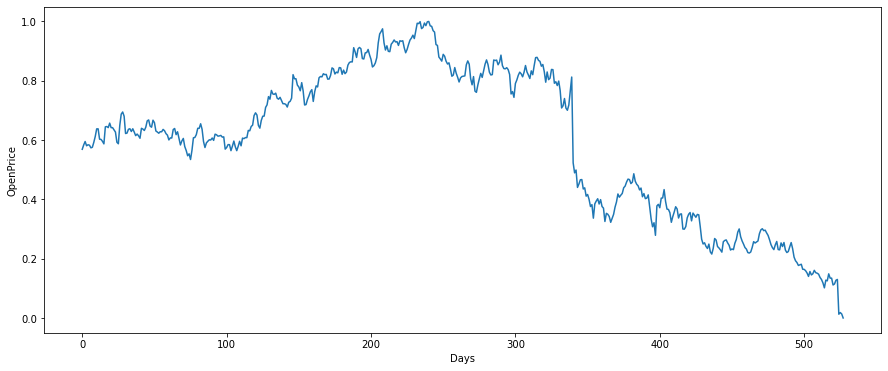

In [13]:
plt.subplots(figsize=(15, 6))
plt.plot(dataset_train_scaled)
plt.xlabel('Days')
plt.ylabel('OpenPrice')
plt.show()

In [14]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    # time_step=50, length_train=528, [51-50, 51]
    X_train.append(dataset_train_scaled[i-time_step:i, 0])
    y_train.append(dataset_train_scaled[i, 0])

                   
X_train, y_train = np.array(X_train), np.array(y_train)
    
#X_train

In [15]:
X_train.shape

(478, 50)

In [16]:
y_train.shape

(478,)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print(X_train.shape)
print(y_train.shape)

(478, 50, 1)
(478, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


2023-09-29 17:09:49.126950: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 17:09:49.305981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/rolling/opt/rviz_ogre_vendor/lib:/opt/ros/rolling/lib/x86_64-linux-gnu:/opt/ros/rolling/lib
2023-09-29 17:09:49.306002: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-29 17:09:49.337747: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for 

In [19]:
reg =Sequential()
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True,input_shape=(X_train.shape[1], 1)))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50))
reg.add(Dropout(0.2))


reg.add(Dense(units=1))


reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = reg.fit(X_train, y_train, epochs=50, batch_size=32)


2023-09-29 17:09:50.706697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/rolling/opt/rviz_ogre_vendor/lib:/opt/ros/rolling/lib/x86_64-linux-gnu:/opt/ros/rolling/lib
2023-09-29 17:09:50.706733: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-29 17:09:50.706757: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mhmud): /proc/driver/nvidia/version does not exist
2023-09-29 17:09:50.707115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/50
15/15 [==============================] - 3s 38ms/step - loss: 0.5931 - accuracy: 0.0021
Epoch 2/50
15/15 [==============================] - 1s 39ms/step - loss: 0.3466 - accuracy: 0.0042
Epoch 3/50
15/15 [==============================] - 1s 46ms/step - loss: 0.3060 - accuracy: 0.0021
Epoch 4/50
15/15 [==============================] - 1s 50ms/step - loss: 0.2506 - accuracy: 0.0042
Epoch 5/50
15/15 [==============================] - 1s 42ms/step - loss: 0.2519 - accuracy: 0.0042
Epoch 6/50
15/15 [==============================] - 1s 44ms/step - loss: 0.2219 - accuracy: 0.0042
Epoch 7/50
15/15 [==============================] - 1s 41ms/step - loss: 0.2068 - accuracy: 0.0042
Epoch 8/50
15/15 [==============================] - 1s 42ms/step - loss: 0.1927 - accuracy: 0.0042
Epoch 9/50
15/15 [==============================] - 1s 40ms/step - loss: 0.1826 - accuracy: 0.0042
Epoch 10/50
15/15 [==============================] - 1s 40ms/step - loss: 0.1697 - accuracy: 0.0042
Epoch 11/

In [20]:
y_pred = reg.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred

15/15 [==============================] - 1s 12ms/step


array([[291.0538  ],
       [290.88107 ],
       [291.33087 ],
       [292.50772 ],
       [291.56232 ],
       [287.8891  ],
       [281.91837 ],
       [274.9234  ],
       [275.55298 ],
       [278.8623  ],
       [279.43375 ],
       [277.94034 ],
       [274.9113  ],
       [271.94348 ],
       [271.94748 ],
       [274.35623 ],
       [276.4313  ],
       [276.8399  ],
       [276.96008 ],
       [275.07806 ],
       [273.76465 ],
       [272.83438 ],
       [270.20938 ],
       [264.35318 ],
       [258.2124  ],
       [254.33992 ],
       [251.74623 ],
       [248.84706 ],
       [248.39229 ],
       [252.49614 ],
       [257.03714 ],
       [261.88904 ],
       [267.38507 ],
       [274.98425 ],
       [279.4337  ],
       [281.29526 ],
       [282.5698  ],
       [280.1775  ],
       [277.4469  ],
       [274.42975 ],
       [269.19397 ],
       [266.3625  ],
       [261.77496 ],
       [258.45984 ],
       [259.0395  ],
       [263.30765 ],
       [268.98633 ],
       [273.6

In [21]:
y_train = scaler.inverse_transform(y_train)


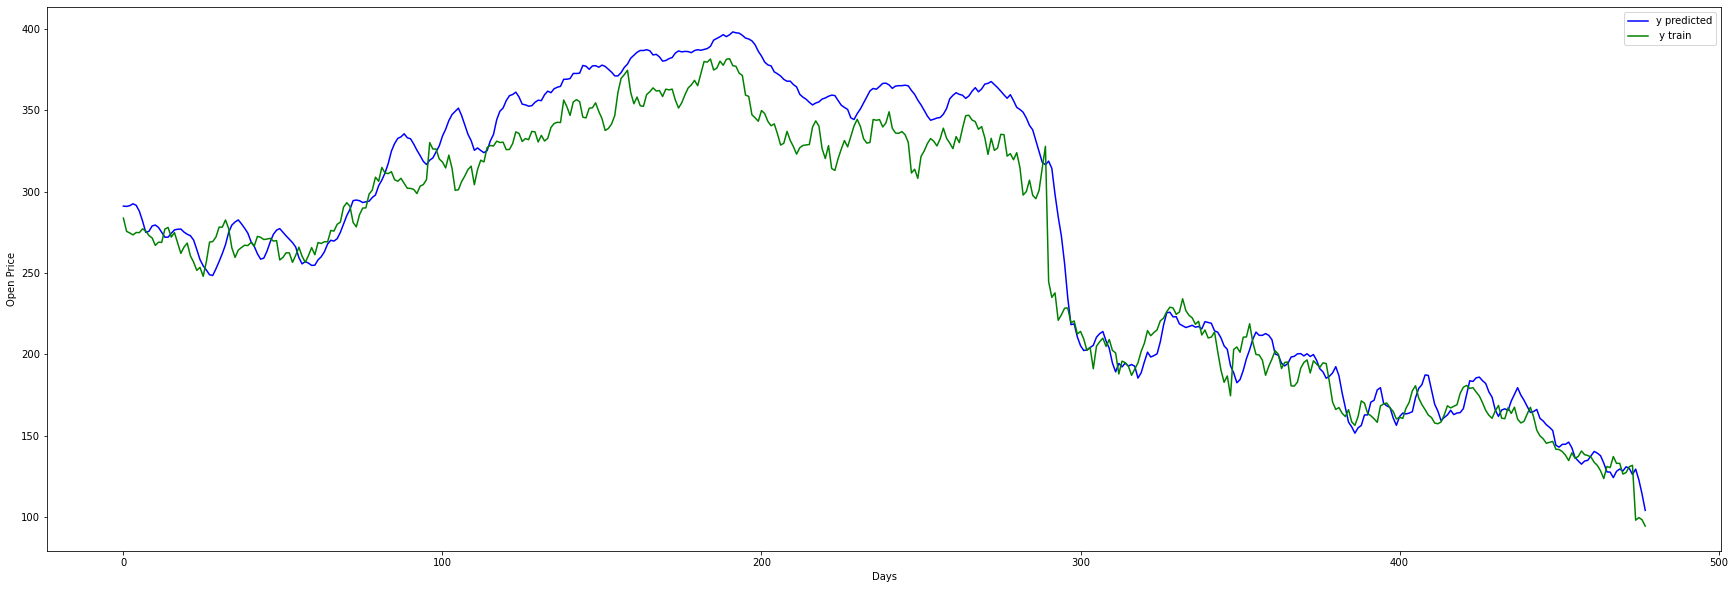

In [22]:
plt.figure(figsize=(30, 10))
plt.plot(y_pred, color='b', label='y predicted')
plt.plot(y_train, color = 'g', label = ' y train')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

In [23]:
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1, 1))
scaled_dataset_validation = scaler.fit_transform(dataset_validation)
scaled_dataset_validation.shape

(227, 1)

In [25]:
y_test = []
X_test = []


for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i, 0])
    y_test.append(scaled_dataset_validation[i, 0])
    

In [26]:
X_test, y_test = np.array(X_test), np.array(y_test)


In [27]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))


In [28]:
X_test.shape

(177, 50, 1)

In [29]:
y_pred_of_test = reg.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)


6/6 [==============================] - 0s 11ms/step


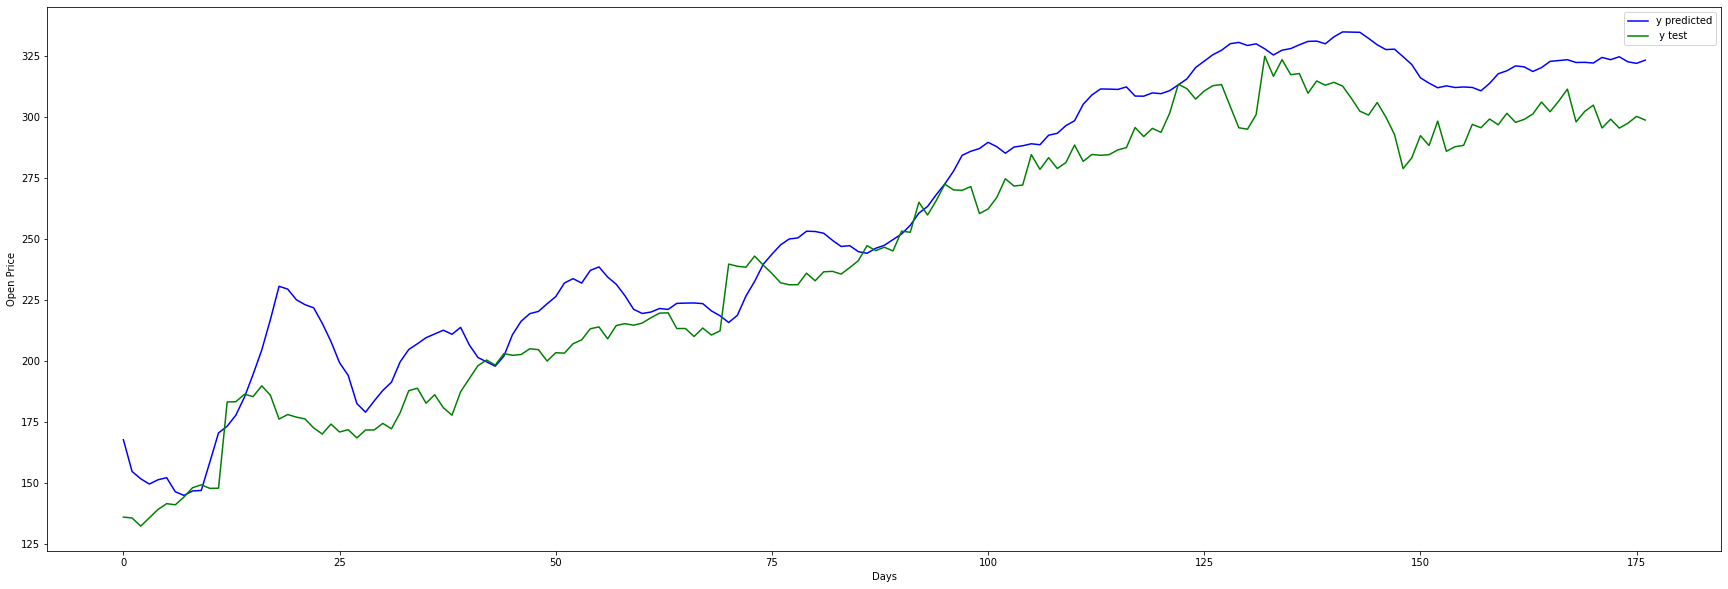

In [32]:

plt.figure(figsize=(30, 10))
plt.plot(y_pred_of_test, color='b', label='y predicted')
plt.plot( scaler.inverse_transform(y_test), color = 'g', label = ' y test')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

In [33]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))


#model_lstm.compile(optimizer='adam', loss='mean_squared_error')
#hist= model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)


In [35]:
X_input=data.iloc[-time_step:].Open.values
X_input = scaler.fit_transform(X_input.reshape(-1, 1))
X_input = np.reshape(X_input, (1, 50, 1))
X_input.shape

(1, 50, 1)

In [37]:
simple_RNN_prediction = scaler.inverse_transform(reg.predict(X_input))
simple_RNN_prediction[0, 0]

1/1 [==============================] - 0s 27ms/step


305.6176

In [38]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
750,2023-09-22,299.299988,305.380005,298.269989,299.079987,299.079987,25351400
751,2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000
752,2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200
753,2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800
754,2023-09-28,298.940002,306.329987,296.700012,303.959991,303.959991,22140800
